In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

### Implement a basic RNN using numpy

In [2]:
import numpy as np
from numpy import tanh

In [3]:
time_steps = 100
inp_features_dim = 32
output_features = 64

In [4]:
input_data = np.random.random((time_steps, inp_features_dim))
state_t =  np.zeros((output_features,))

In [5]:
W = np.ones((output_features, inp_features_dim))

U = np.ones((output_features, output_features))

b = np.ones((output_features,))

In [6]:
outputs = []

for inp_t in input_data:
    output_t = tanh(np.dot(W, inp_t) + np.dot(U, state_t) + b) 
    outputs.append(output_t)
    
    state_t = output_t

In [7]:
print(input_data.shape)
print(inp_t.shape)

(100, 32)
(32,)


In [8]:
print(W.shape)
print(inp_t.shape)
print(np.dot(W, inp_t).shape)

(64, 32)
(32,)
(64,)


In [9]:
print(U.shape)
print(output_t.shape)
print(np.dot(U, output_t).shape)

(64, 64)
(64,)
(64,)


In [10]:
print(b.shape)
print(output_t.shape)

(64,)
(64,)


In [11]:
print(len(outputs))

100


### Implement a basic RNN using keras

In [12]:
from keras import Sequential
from keras.layers import Embedding, SimpleRNN

Using TensorFlow backend.


In [13]:
vocab_size = 10000
embedding_dims = 50

In [14]:
model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_dims))
model1.add(SimpleRNN(60, return_sequences=False))

In [15]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 50)          500000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 60)                6660      
Total params: 506,660
Trainable params: 506,660
Non-trainable params: 0
_________________________________________________________________


In [16]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

### Implement a basic RNN using keras that returns all intermediate seqences too

In [17]:
model2 = Sequential()
model2.add(Embedding(vocab_size, embedding_dims))
model2.add(SimpleRNN(60, return_sequences=True))

In [18]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 50)          500000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 60)          6660      
Total params: 506,660
Trainable params: 506,660
Non-trainable params: 0
_________________________________________________________________


In [19]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

### Stacked RNNs

In [20]:
model3 = Sequential()
model3.add(Embedding(vocab_size, embedding_dims))
model3.add(SimpleRNN(100, return_sequences=True))
model3.add(SimpleRNN(50, return_sequences=True))
model3.add(SimpleRNN(20, return_sequences=False))

In [21]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 50)          500000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 100)         15100     
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 50)          7550      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 20)                1420      
Total params: 524,070
Trainable params: 524,070
Non-trainable params: 0
_________________________________________________________________


### Implement IMDB classification using RNN via keras

In [22]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences 

from keras import Sequential
from keras.layers import Dense, SimpleRNN, Embedding

In [23]:
vocab_size = 10000
max_len = 20
batch_size = 32

In [24]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

In [25]:
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

(25000, 'train sequences')
(25000, 'test sequences')


In [26]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [27]:
print('input_train shape:', X_train.shape)
print('input_test shape:', X_test.shape)

('input_train shape:', (25000, 20))
('input_test shape:', (25000, 20))


In [28]:
model4 = Sequential()
model4.add(Embedding(vocab_size,8))
model4.add(SimpleRNN(64))
model4.add(Dense(1, activation='sigmoid'))

In [29]:
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 8)           80000     
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 64)                4672      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 84,737
Trainable params: 84,737
Non-trainable params: 0
_________________________________________________________________


In [30]:
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [31]:
history = model4.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 24s 1ms/step - loss: 0.5924 - acc: 0.6635 - val_loss: 0.5403 - val_acc: 0.7290
Epoch 2/5
20000/20000 [==============================] - 23s 1ms/step - loss: 0.4183 - acc: 0.8102 - val_loss: 0.5119 - val_acc: 0.7460
Epoch 3/5
20000/20000 [==============================] - 23s 1ms/step - loss: 0.3219 - acc: 0.8653 - val_loss: 0.5498 - val_acc: 0.7308
Epoch 4/5
20000/20000 [==============================] - 23s 1ms/step - loss: 0.2209 - acc: 0.9149 - val_loss: 0.6466 - val_acc: 0.7226
Epoch 5/5
20000/20000 [==============================] - 23s 1ms/step - loss: 0.1380 - acc: 0.9514 - val_loss: 0.7936 - val_acc: 0.7240


/Users/airwoot/anaconda3/envs/testing_anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


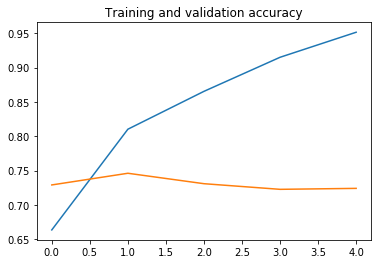

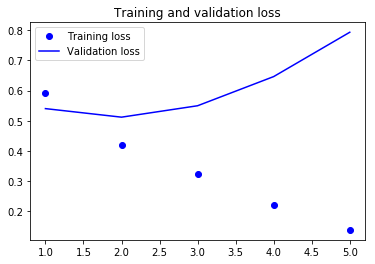

In [33]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(acc)
plt.plot(val_acc)

plt.title('Training and validation accuracy')
plt.legend()


plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()